## Notebook for the Healthy reference epithelial cells preparation

**Developed by**: Anna Maguza  
**Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich**  
**15 May 2023**  

#### Load required packages

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sci

In [2]:
import scrublet

#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


In [5]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

#### Upload Data

In [7]:
input_path_healthy = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_integrated_data_all_genes.h5ad'
Healthy_adata = sc.read_h5ad(input_path_healthy)

In [8]:
X_is_raw(Healthy_adata)

True

### Preprocess obs

In [9]:
# Copy raw data to .raw
Healthy_adata.raw = Healthy_adata

In [10]:
# Rename values in Cancer_adata.obs['ClusterTop'] as in Healthy_adata.obs['Cell Type']
Healthy_adata.obs['Cell Type'].replace({'Stem Cell': 'Epithelial'}, inplace=True)

In [11]:
# Rename values in Cancer_adata.obs['ClusterTop'] as in Healthy_adata.obs['Cell Type']
Healthy_adata.obs['Location'].replace({'SmallInt' : 'Small Intestine',
                                            'Small Bowel' : 'Small Intestine',
                                            'LargeInt': 'Large Intestine',
                                            'Colon': 'Large Intestine',
                                            'REC' : 'Rectum',
                                            'Epi': 'Epithelium',
                                            'LP': 'Lamina Propria'}, inplace=True)

In [12]:
Healthy_adata.obs['Study_name'].replace({'Wang' : 'Wang, 2020',
                                            'Kong 2023' : 'Kong, 2023',
                                            'Smilie': 'Smilie, 2019',
                                            'Gut Cell Atlas': 'Elmentaite, 2021'}, inplace=True)

In [13]:
Healthy_adata.obs['Library_Preparation_Protocol'].replace({"3'" : "10x 3' v1",
                                            "5'" : "10x 5' v1",
                                            "nan" : "10x 3' v1"}, inplace=True)

In [14]:
Healthy_adata.obs['Library_Preparation_Protocol'].value_counts()

10x 3' v1    263513
10x 5' v1    178477
10x 3' v2     88413
10x 3' v3     26696
Name: Library_Preparation_Protocol, dtype: int64

In [15]:
Healthy_adata.obs.rename(columns={'Gender': 'Sex'}, inplace=True)

In [16]:
# List of Donor_IDs for 'Female'
female_donors = ['Wang_Donor_2', 'N7', 'N8', 'N10', 'N13', 'N14', 'N18', 'N19', 'N20', 'N21', 'N23', 'N24', 'N44', 'N50', 'N106', 'N110', 'N111', 'N539']

# Assign 'Female' to specified Donor_IDs with 'nan' in 'Sex'
Healthy_adata.obs.loc[(Healthy_adata.obs['Donor_ID'].isin(female_donors)) & (Healthy_adata.obs['Sex'] == 'nan'), 'Sex'] = 'Female'

# Assign 'Male' to the remaining 'nan' entries in 'Sex'
Healthy_adata.obs.loc[Healthy_adata.obs['Sex'] == 'nan', 'Sex'] = 'Male'

In [17]:
Healthy_adata.write_h5ad('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_integrated_data_all_genes.h5ad')

### Prepare Epithelial Cells

In [6]:
input_path_healthy = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_integrated_data_all_genes.h5ad'
Healthy_adata = sc.read_h5ad(input_path_healthy)
X_is_raw(Healthy_adata)

True

In [7]:
# Filter out fetal and pediatric samples
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Fetal Healthy', :]
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Pediatric healthy', :]

In [8]:
Healthy_adata = Healthy_adata[Healthy_adata.obs['Cell Type'] == 'Epithelial', :]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocytes TMIGD1 MEP1A'),
  Text(2, 0, 'Stem cells OLFM4'),
  Text(3, 0, 'Enterocytes CA1 CA2 CA4-'),
  Text(4, 0, 'Colonocyte'),
  Text(5, 0, 'Enterocyte'),
  Text(6, 0, 'Stem cells OLFM4 LGR5'),
  Text(7, 0, 'Goblet cells MUC2 TFF1-'),
  Text(8, 0, 'Epithelial Cycling cells'),
  Text(9, 0, 'BEST4+ epithelial'),
  Text(10, 0, 'BEST2+ Goblet cell'),
  Text(11, 0, 'Goblet cells MUC2 TFF1'),
  Text(12, 0, 'Paneth'),
  Text(13, 0, 'Enterocytes BEST4'),
  Text(14, 0, 'Paneth cells'),
  Text(15, 0, 'Stem_Cells_GCA'),
  Text(16, 0, 'Stem cells OLFM4 PCNA'),
  Text(17, 0, 'Epithelial HBB HBA'),
  Text(18, 0, 'Tuft cells'),
  Text(19, 0, 'Goblet cell'),
  Text(20, 0, 'Goblet cells SPINK4'),
  Text(21, 0, 'Tuft'),
  Text(22, 0, 'Epithelia

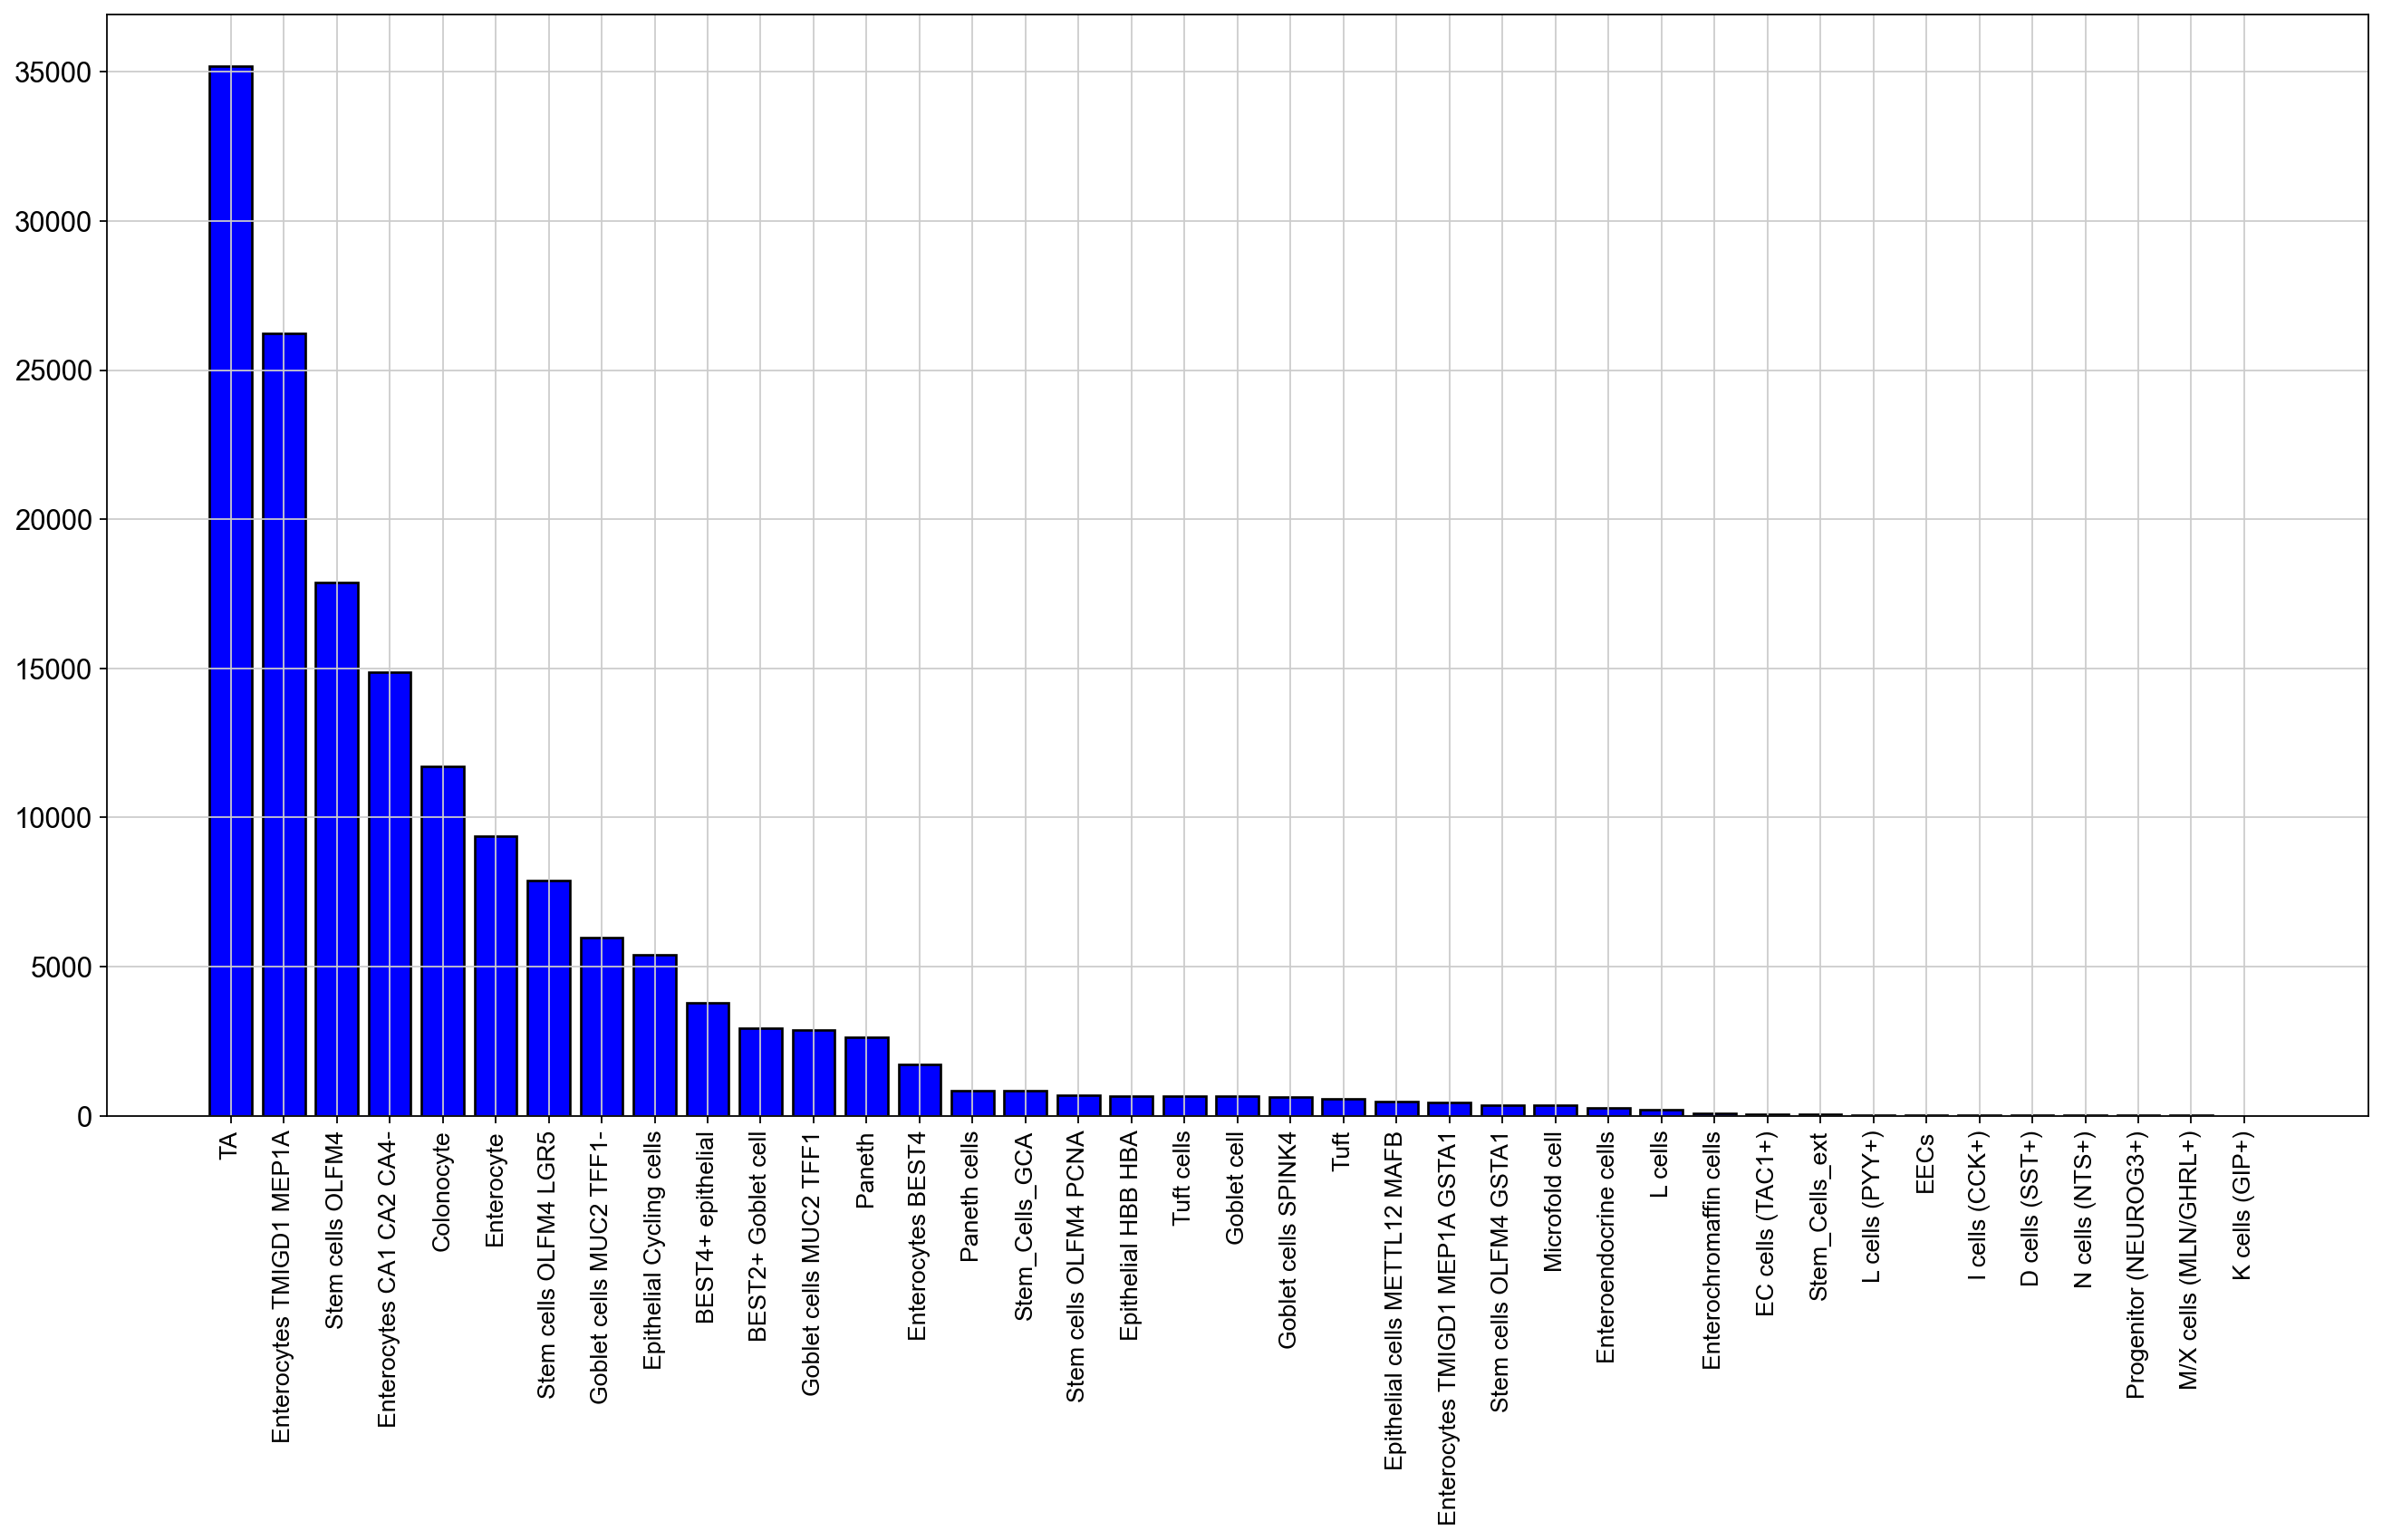

In [9]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Cell States"].value_counts().index, Healthy_adata.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
plt.xticks(rotation = 90, fontsize = 12)

In [10]:
Healthy_adata.obs['Unified Cell States'] = Healthy_adata.obs['Cell States']

Healthy_adata.obs['Unified Cell States'].replace({"Enterocytes TMIGD1 MEP1A": 'Enterocyte',
                                               'Enterocytes CA1 CA2 CA4-': 'Enterocyte',
                                               'Enterocytes TMIGD1 MEP1A GSTA1': 'Enterocyte',
                                               'Enterocytes BEST4': 'Enterocyte',
                                               'BEST4+ epithelial': 'Enterocyte',
                                               'Stem_Cells_GCA': 'Stem cells',
                                               'Stem_Cells_ext': 'Stem cells',
                                               'Tuft': 'Tuft cells',
                                               'Paneth': 'Paneth cells',
                                               'Epithelial Cycling cells': 'TA',
                                               'Goblet cells SPINK4': 'Goblet cells',
                                               'Goblet cell': 'Goblet cells',
                                               'Goblet cells MUC2 TFF1-': 'Goblet cells',
                                               'Goblet cells MUC2 TFF1': 'Goblet cells',
                                               'BEST2+ Goblet cell': 'Goblet cells',
                                               'EC cells (TAC1+)': 'Enterochromaffin cells',
                                               'EECs': 'Enteroendocrine cells',
                                               'K cells (GIP+)': 'Enteroendocrine cells',
                                               'M/X cells (MLN/GHRL+)': 'Enteroendocrine cells',
                                               'Progenitor (NEUROG3+)': 'Enteroendocrine cells',
                                               'D cells (SST+)': 'Enteroendocrine cells',
                                               'I cells (CCK+)': 'Enteroendocrine cells',
                                               'N cells (NTS+)': 'Enteroendocrine cells',
                                               'L cells (PYY+)': 'L cells',
                                               'Stem cells OLFM4': 'Stem cells',
                                               'Stem cells OLFM4 GSTA1': 'Stem cells',
                                               'Stem cells OLFM4 LGR5': 'Stem cells',
                                               'Stem cells OLFM4 PCNA': 'Stem cells',
                                               'Epithelial HBB HBA': 'Epithelial cells', 
                                               'Epithelial cells METTL12 MAFB': 'Epithelial cells',}, inplace=True)

/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_57977/2991935742.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Healthy_adata.obs['Unified Cell States'] = Healthy_adata.obs['Cell States']


In [11]:
Healthy_adata.obs['Unified Cell States'].value_counts()

Enterocyte                56398
TA                        40570
Stem cells                27658
Goblet cells              13051
Colonocyte                11707
Paneth cells               3468
Tuft cells                 1204
Epithelial cells           1141
Microfold cell              340
Enteroendocrine cells       311
L cells                     228
Enterochromaffin cells      119
Name: Unified Cell States, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Enterocyte'),
  Text(1, 0, 'TA'),
  Text(2, 0, 'Stem cells'),
  Text(3, 0, 'Goblet cells'),
  Text(4, 0, 'Colonocyte'),
  Text(5, 0, 'Paneth cells'),
  Text(6, 0, 'Tuft cells'),
  Text(7, 0, 'Epithelial cells'),
  Text(8, 0, 'Microfold cell'),
  Text(9, 0, 'Enteroendocrine cells'),
  Text(10, 0, 'L cells'),
  Text(11, 0, 'Enterochromaffin cells')])

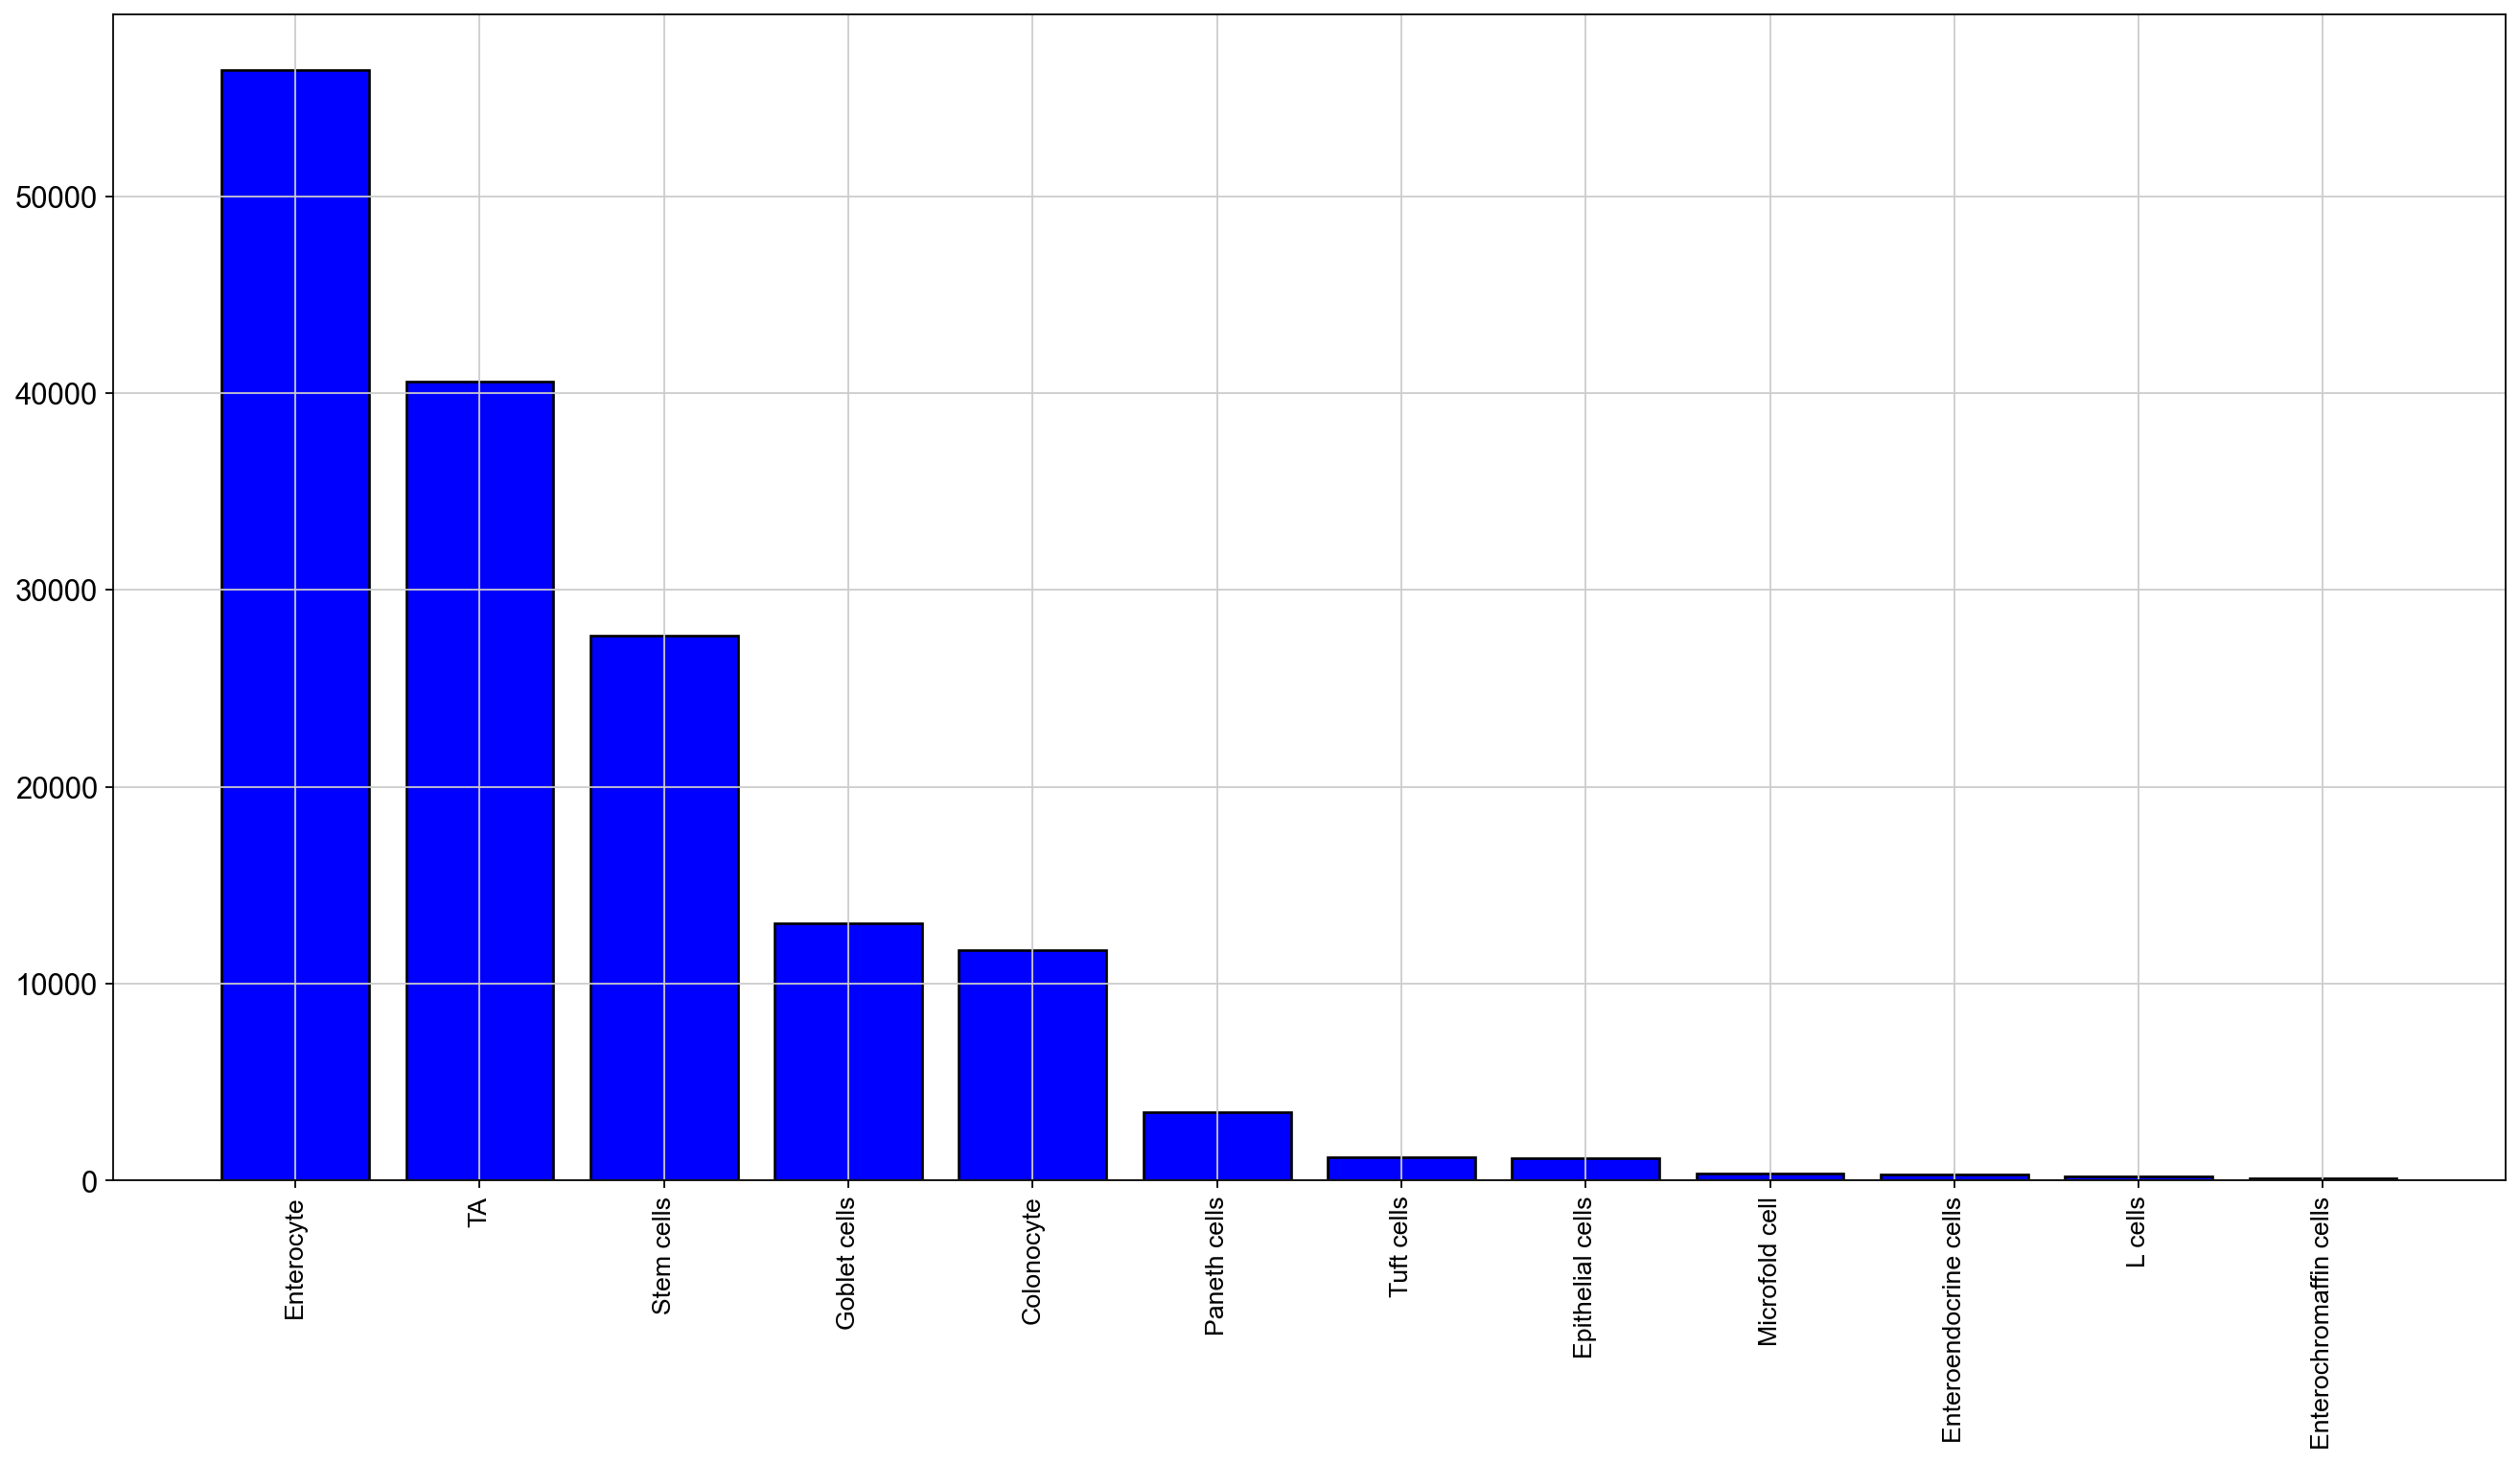

In [12]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Unified Cell States"].value_counts().index, Healthy_adata.obs["Unified Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
plt.xticks(rotation = 90, fontsize = 12)

### Doublets Prediction

In [14]:
Healthy_adata

AnnData object with n_obs × n_vars = 156195 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'Unified Cell States'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'

In [15]:
scrub = scrublet.Scrublet(Healthy_adata.X)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.80
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 6.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 392.6 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

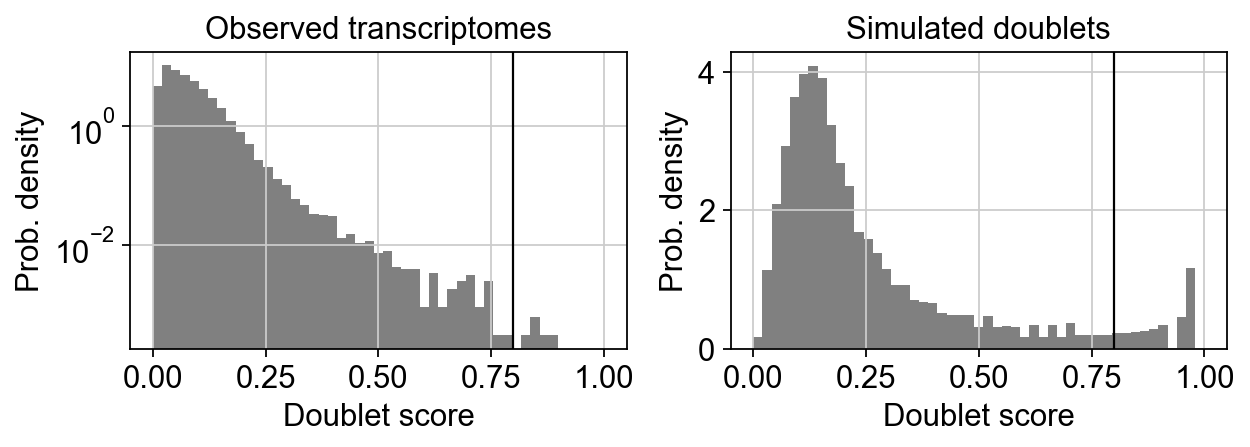

In [16]:
Healthy_adata.obs['doublet_scores'], Healthy_adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [17]:
sum(Healthy_adata.obs['predicted_doublets'])

5

In [18]:
# add in column with singlet/doublet instead of True/False
Healthy_adata.obs['doublet_info'] = Healthy_adata.obs["predicted_doublets"].astype(str)

In [20]:
Healthy_adata.raw.X

<156195x26442 sparse matrix of type '<class 'numpy.float32'>'
	with 202376650 stored elements in Compressed Sparse Row format>

In [21]:
X_is_raw(Healthy_adata)

True

In [22]:
# Write to h5ad
Healthy_adata.write_h5ad('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_epithelial_cells_all_genes.h5ad')